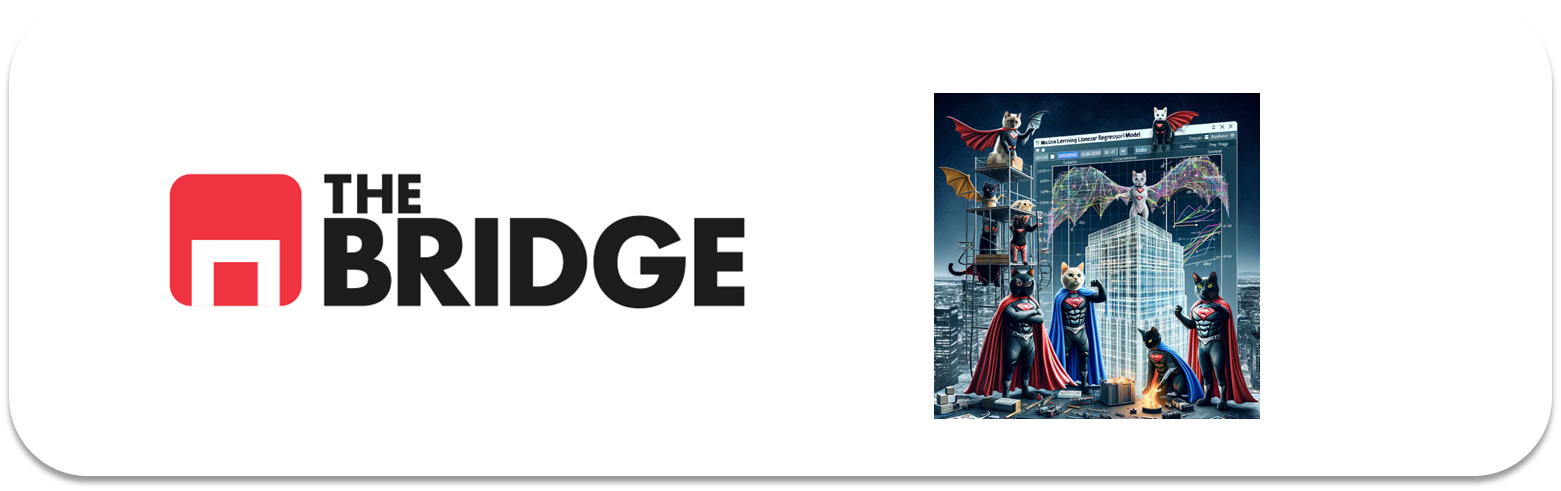

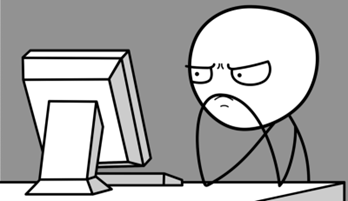

Para ejercitarte y afianzar lo aprendido sobre **Regresión Logística para clasificación binaria**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Inicio: Entendiendo el problema

En este caso `el objetivo de los ejercicios es hacer un modelado de regresión logística sobre el dataset conocidos como "Adults" o "Census Income" que permita casificar a las personas en si ganan más de 50K dolares o no, en función de una serie de características demográficas y de empleo`. Sigue las instrucciones cuando sea necesario para poder continuar

El nombre de las columnas y sus valores se muestra a continuación (las columnas siguen el mismo orden que en el fichero, por si tuvieras que utilizar estos nombres)

* age: edad, continuous.  

* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.  

* fnlwgt: continuous (a eliminar)  

* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.  

* education-num: continuous.  

* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.  

* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.  

* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.  

* sex: Female, Male.  

* capital-gain: continuous.  

* capital-loss: continuous.  

* hours-per-week: continuous.  

* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. 

* salary: income in dollars


### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OrdinalEncoder


### Ejercicio 1: Carga de datos y vistazo


Carga el conjunto de datos de TRAIN ("./data/adult.data") en un dataframe (tendrás que explorar el tipo de archivo y darle nombre a las columnas). Muestra la descripción de los datos y las primeras filas del conjunto de datos.

*Cargamos los datos, que es un poco tricky*

In [2]:
train_set = pd.read_csv('./data/adult.data', header=None)

columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
           'marital_status', 'occupation', 'relationship', 'race', 'sex',
           'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

train_set.columns = columns

train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Ejercicio 2: Preparación y limpieza de Datos (I)

En una situación normal tendríamos que revisar el dataset para ver qué podemos limpiar (convertir tipos, cambiar valores raros, etc) y sólo no deberíamos imputar faltantes sobre el dataset global. Aquí te dirigiré los pasos:

1. Quita los espacios iniciales y finales de todos los valores string del dataset.
2. Comprueba que 'workclass', 'occupation', 'native-country' contienen un valor "raro", que indica los faltantes (este es un ejemplo de dataset con "missing" que no están marcados por np.NaN)
3. Deshazte de las columna "fnlwgt" que ni se entiende, ni se necesita y deshazte de las filas con esos faltantes (tenemos muchos datos y poco "tiempo").

In [4]:
# Aplicar str.strip() a todas las columnas de tipo string
train_set = train_set.map(lambda x: x.strip() if isinstance(x, str) else x)


In [5]:
# Los valores missing de las siguientes columnas aparecen como "?"
print(train_set['workclass'].value_counts())
print(train_set['occupation'].value_counts())
print(train_set['native_country'].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64
native_country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106


In [6]:
# Eliminar columna "fnlwgt"
train_set.drop(columns='fnlwgt', inplace=True)

# Eliminar filas con valores missing
train_set.replace('?', np.nan, inplace=True)
train_set.dropna(inplace=True)

# df info. Ya no hay nulos
train_set.info()


<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   education       30162 non-null  object
 3   education_num   30162 non-null  int64 
 4   marital_status  30162 non-null  object
 5   occupation      30162 non-null  object
 6   relationship    30162 non-null  object
 7   race            30162 non-null  object
 8   sex             30162 non-null  object
 9   capital_gain    30162 non-null  int64 
 10  capital_loss    30162 non-null  int64 
 11  hours_per_week  30162 non-null  int64 
 12  native_country  30162 non-null  object
 13  income          30162 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


### Ejercicio 3: Preparación y limpieza de Datos (II)

Muestra el reparto de valores de "native-country". Convierte la variable en una binara con 1 para ciudadanos norteamericanos y 0 para el resto.

NOTA: En otras ocasiones lo hubieramos tratados por continentes por ejemplo, pero de primeras la diferencia de distribución es tan alta que es mejor simplificar que no quedarse con todos los valores

In [7]:
# Distribución
train_set['native_country'].value_counts()

native_country
United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
El-Salvador                     100
India                           100
Cuba                             92
England                          86
Jamaica                          80
South                            71
Italy                            68
China                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Columbia                         56
Poland                           56
Haiti                            42
Iran                             42
Taiwan                           42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
France       

In [8]:
# Se convierte en tipo entero
north_america = ['United-States', 'Mexico', 'Canada']
train_set['native_country_bool'] = train_set['native_country'].apply(lambda x: 1 if x in north_america else 0)


### Ejercicio 4: Preparación y limpieza de Datos (III)

Escoge la variable target, ¿qué particularidad tiene?¿qué debemos hacer con ella? Hazlo.

In [9]:
# Distribución del target
target = 'income'
train_set[target].value_counts()

income
<=50K    22654
>50K      7508
Name: count, dtype: int64

In [10]:
# Convertir el target en booleano. 1==>50K
train_set[target] = train_set[target].apply(lambda x: 1 if x == '>50K' else 0)
train_set[target].value_counts()

income
0    22654
1     7508
Name: count, dtype: int64

### Ejercicio 5: Preparar variables categóricas (I)

Prepara las variables categóricas, salvo "education" y "native_country" (o su equivalente si no la has llamado así al connvertirla en binaria), convirtiéndolas con un one-hot encoding (usa el pd.get_dummies). NOTA: Recuerda que este es el dataset de train, por eso lo atacamos directamente.

In [11]:
# Columns selection
excluded_cols = ['education', 'native_country']
cat_cols = train_set.select_dtypes(include=['object']).columns
cols_to_encode = [col for col in cat_cols if col not in excluded_cols]

# One-hot encoding. Van a aparecer muchas columnas nuevas
train_set = pd.get_dummies(train_set, columns=cols_to_encode, dtype=int)


In [12]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 50 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   age                                   30162 non-null  int64 
 1   education                             30162 non-null  object
 2   education_num                         30162 non-null  int64 
 3   capital_gain                          30162 non-null  int64 
 4   capital_loss                          30162 non-null  int64 
 5   hours_per_week                        30162 non-null  int64 
 6   native_country                        30162 non-null  object
 7   income                                30162 non-null  int64 
 8   native_country_bool                   30162 non-null  int64 
 9   workclass_Federal-gov                 30162 non-null  int64 
 10  workclass_Local-gov                   30162 non-null  int64 
 11  workclass_Private                

### Ejercicio 6: Preparar variables categóricas (II)

Codifica la variable "education" usando un ordinal encoding, no uses la codificación por defecto, elígela tú y razónala o bien demuestra pillería y que has revisado el dataset.

In [13]:
train_set.education.value_counts()

education
HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: count, dtype: int64

In [14]:
# Orden creciente (por defecto en OrdinalEncoder()). Van del 0 al 15
education_order = [[
    'Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th',
    'HS-grad', 'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 
    'Masters', 'Doctorate', 'Prof-school'
    ]]
ordinal_encoder = OrdinalEncoder(categories=education_order)
train_set['education_ordinal'] = ordinal_encoder.fit_transform(train_set[['education']])

train_set[['education', 'education_ordinal']].sample(10)


,education,education_ordinal
2788,Masters,13.0
11220,HS-grad,8.0
5964,HS-grad,8.0
29725,Some-college,9.0
24850,Prof-school,15.0
11335,Bachelors,12.0
12567,HS-grad,8.0
1548,Some-college,9.0
25390,Assoc-voc,11.0
25970,Some-college,9.0


NOTA: En un ejercicio completo deberíamos decidir si escalar las variables numéricas contínuas, si quieres puedes hacero tú como extra y comparar con el modelo que vamos a completar en este conjunto de ejercicios.

### Ejercicio 7: Modelo (I)

Instancia el modelo de regresión logística, con el hiperparámetro "max_iter" a 10000.

In [15]:
# Instancia de Regresión logística
model_logReg = LogisticRegression(max_iter=10_000)


### Ejercicio 8: Entrenamiento

Entrena modelo para el dataset de train tal como lo hemos preparado, creando antes el dataset sólo de features (X_train) y la serie con los valores del target (y_train). NOTA: Deshazte de "education_num" si has codificado tú a mano "education".

In [16]:
# Backup
train_set_bck = train_set.copy()

In [17]:
# Eliminar las varibales que he codificado de otra forma
train_set.drop(columns=['education', 'education_num', 'native_country'], inplace=True)

# Separación de "X" e "y"
X_train = train_set.drop(columns=target).copy()
y_train = train_set[target].copy()

In [18]:
# Entrenar modelo
model_logReg.fit(X_train, y_train)

c:\Users\Lander\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10000)

### Ejercicio 9: Evaluación (I)

Previo a la evaluación necesitamos obtener y preparar el dataset de test. Carga el dataset a partir de "./data/adult.test". Luego aplícale las mismas operaciones que has realizado sobre el train. (NOTA; Puede que tengas que cambiar alguna cosa en la variable "income" para convertirla)

In [19]:
# Cargar set de test
test_set = pd.read_csv('./data/adult.test', header=None)

# Añadir nombre columnas
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
           'marital_status', 'occupation', 'relationship', 'race', 'sex',
           'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
test_set.columns = columns

# Aplicar str.strip() a todas las columnas de tipo string
test_set = test_set.map(lambda x: x.strip() if isinstance(x, str) else x)

# Eliminar columna "fnlwgt"
test_set.drop(columns='fnlwgt', inplace=True)

# Eliminar filas con valores missing
test_set.replace('?', np.nan, inplace=True)
test_set.dropna(inplace=True)

# Se convierte en tipo entero la variable native country
north_america = ['United-States', 'Mexico', 'Canada']
test_set['native_country_bool'] = test_set['native_country'].apply(lambda x: 1 if x in north_america else 0)

# Convertir el target en booleano. 1 == >50K.
target = 'income'
test_set[target] = test_set[target].apply(lambda x: 1 if x == '>50K.' else 0)
test_set[target].value_counts()

# One-hot encoding. Van a aparecer muchas columnas nuevas
excluded_cols = ['education', 'native_country']
cat_cols = test_set.select_dtypes(include=['object']).columns
cols_to_encode = [col for col in cat_cols if col not in excluded_cols]
test_set = pd.get_dummies(test_set, columns=cols_to_encode, dtype=int)

# Ordinal Encoder. Orden creciente. Van del 0 al 15
education_order = [[
    'Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th',
    'HS-grad', 'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 
    'Masters', 'Doctorate', 'Prof-school'
    ]]
ordinal_encoder = OrdinalEncoder(categories=education_order)
test_set['education_ordinal'] = ordinal_encoder.fit_transform(test_set[['education']])

# Eliminar las varibales que he codificado de otra forma
test_set.drop(columns=['education', 'education_num', 'native_country'], inplace=True)

# Display test_set
display(test_set.head())

# Separación de "X" e "y"
X_test = test_set.drop(columns=target).copy()
y_test = test_set[target].copy()


,age,capital_gain,capital_loss,hours_per_week,income,native_country_bool,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,education_ordinal
0,25,0,0,40,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,6.0
1,38,0,0,50,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,8.0
2,28,0,0,40,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,10.0
3,44,7688,0,40,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,9.0
5,34,0,0,30,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,5.0


### Ejercicio 10: Evaluación (II)

Obten la predicción para X_train y para X_test.

In [20]:
print(model_logReg.coef_)
print(model_logReg.intercept_)
print(model_logReg.classes_)

[[ 2.58145826e-02  3.15987801e-04  6.40794357e-04  2.96028401e-02
   1.45565641e-01  1.76285414e-01 -5.11874278e-01 -3.34765124e-01
  -1.52719884e-01 -8.34987970e-01 -6.12157699e-01 -7.84222019e-01
  -9.55336650e-01  1.07220797e+00  9.03666633e-01 -9.08060710e-01
  -1.41312879e+00 -9.86683316e-01 -7.67106705e-01 -1.03961974e-01
  -2.22075593e-01 -7.46991801e-02  6.89276610e-01 -1.13341649e+00
  -8.12916474e-01 -4.07238098e-01 -9.61514519e-01 -1.38810984e+00
   4.45648267e-01  4.56710192e-01  1.74085219e-01  4.98793264e-01
  -2.15022946e-01 -5.21837054e-01 -3.10016701e-01 -1.08118977e+00
  -1.46724058e+00 -4.56277404e-01  7.82119951e-01 -9.18507831e-01
  -3.41244684e-01 -4.66607276e-01 -9.84402352e-01 -3.43679415e-01
  -1.95576599e+00 -1.09867557e+00  2.76490766e-01]]
[-4.25299754]
[0 1]


In [21]:
# Predicciones
pred_train = model_logReg.predict(X_train)
pred_test = model_logReg.predict(X_test)

In [22]:
# Accuracy. Aunque igual no tiene mucho sentido porque la distribución no es balanceada
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)

print("Accuracy train:", acc_train)
print("Accuracy test:", acc_test)

print(y_train.value_counts(True))
print(y_test.value_counts(True))

Accuracy train: 0.848186459783834
Accuracy test: 0.847211155378486
income
0    0.751078
1    0.248922
Name: proportion, dtype: float64
income
0    0.754316
1    0.245684
Name: proportion, dtype: float64


### Ejercicio 11: Evaluación (III)

Muestra la matriz de confusión para los resultados de train, así como el clasification_report de sklearn

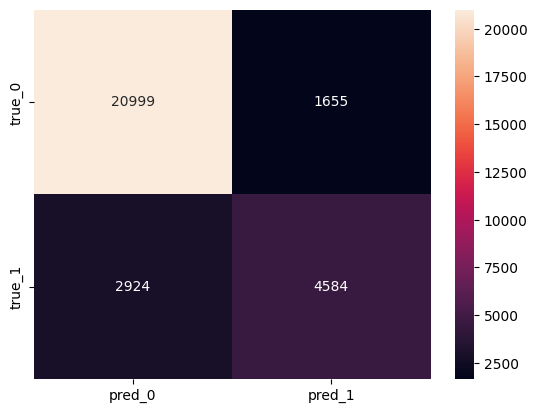

In [23]:
# Matriz de confusión
c_matrix = confusion_matrix(y_train, pred_train)
c_matrix_df = pd.DataFrame(c_matrix, columns = ['pred_0', 'pred_1'],
                          index = ['true_0', 'true_1'])

# Dibujar con seaborn
sns.heatmap(c_matrix_df, annot=True, fmt='g');

c:\Users\Lander\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


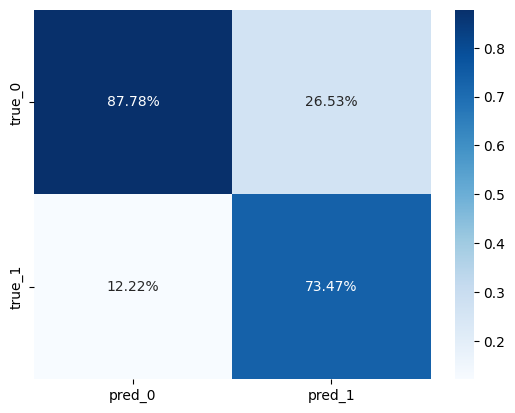

In [24]:
# Otra representación
sns.heatmap(c_matrix_df/np.sum(c_matrix_df), annot=True, 
            fmt='.2%', cmap='Blues');

In [25]:
# Classification_report Es una métrica que nos va
# a decir por clase su precisión y su recall.
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     22654
           1       0.73      0.61      0.67      7508

    accuracy                           0.85     30162
   macro avg       0.81      0.77      0.78     30162
weighted avg       0.84      0.85      0.84     30162



### Ejercicio 12: Evaluación (IV)
Muestra la matriz de confusión y el classification report para los resultados del test. Comparála con los de train.

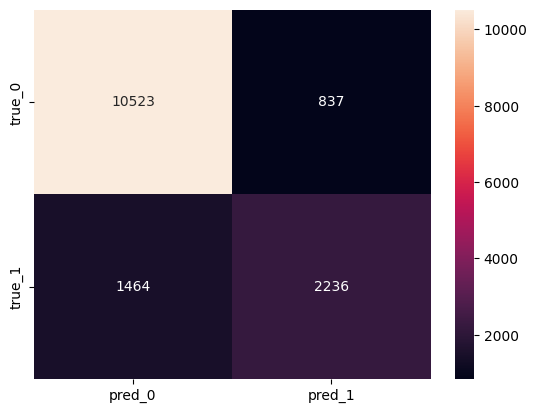

c:\Users\Lander\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


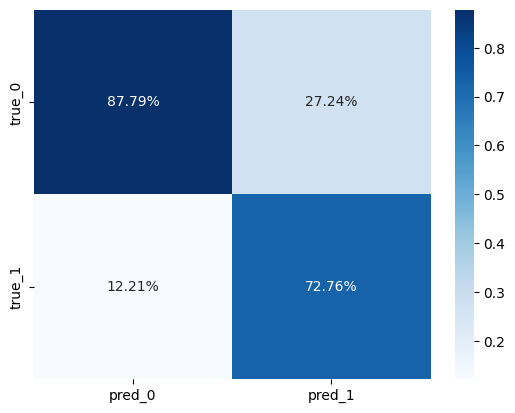

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     11360
           1       0.73      0.60      0.66      3700

    accuracy                           0.85     15060
   macro avg       0.80      0.77      0.78     15060
weighted avg       0.84      0.85      0.84     15060



In [26]:
# Matriz de confusión
c_matrix = confusion_matrix(y_test, pred_test)
c_matrix_df = pd.DataFrame(c_matrix, columns = ['pred_0', 'pred_1'],
                          index = ['true_0', 'true_1'])

# Dibujar con seaborn
sns.heatmap(c_matrix_df, annot=True, fmt='g');
plt.show()

# Otra representación
sns.heatmap(c_matrix_df/np.sum(c_matrix_df), annot=True, 
            fmt='.2%', cmap='Blues');
plt.show()

# Classification_report Es una métrica que nos va
# a decir por clase su precisión y su recall.
print(classification_report(y_test, pred_test))

El modelo me parece bastante bueno. Si nos fijamos en los TP, TN, FP, y FN en valor porcentual, parece que generaliza bien porque tanto para el set de test como para el de train los valores son similares.

### Extra: 

1. Muestra la curva ROC de test.

2. Muestra los coeficientes y su importancia.

In [27]:

def plot_roc_curve(model, X, y):
    '''
    Plots the Receiver Operating Characteristic (ROC) curve for a given model's predictions.
    Typically apply on test set.

    Parameters:
    -----------
    model : estimator object
        The fitted model from which to predict probabilities.
    
    X : array-like of shape (n_samples, n_features)
        The input samples to predict probabilities on.
    
    y : array-like of shape (n_samples,)
        True binary labels for X.

    Returns:
    --------
    None
        This function plots the ROC curve but does not return any value.
    '''
    
    # Predict probabilities
    scores = model.predict_proba(X)
    
    # Compute ROC curve and ROC area
    fpr, tpr, thresholds = roc_curve(y, scores[:, 1])
    roc_auc = auc(fpr, tpr)
    print("AUC: %.2f" %(roc_auc))
    
    # Plotting the ROC curve
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, linewidth=2, color='blue', label=f'ROC (area = {roc_auc:0.2f})')
    plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
    plt.ylabel('True Positive Rate (Recall)')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve')
    plt.grid()
    plt.axis([0, 1, 0, 1])
    plt.legend(loc='lower right', fontsize=13)
    plt.show()


AUC: 0.90


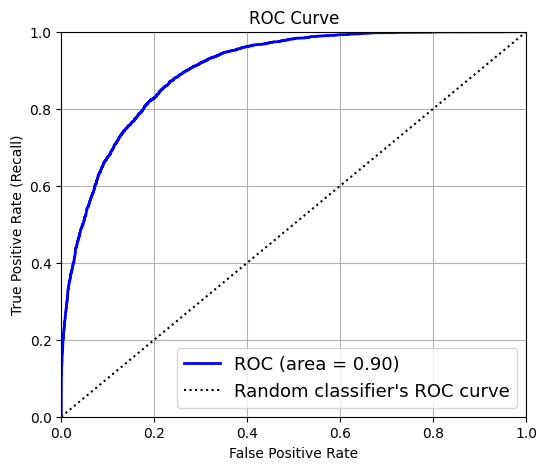

In [28]:
plot_roc_curve(model_logReg, X_test, y_test)

In [29]:
# Coeficientes
print(model_logReg.coef_)
print(model_logReg.intercept_)

print(model_logReg.classes_)

[[ 2.58145826e-02  3.15987801e-04  6.40794357e-04  2.96028401e-02
   1.45565641e-01  1.76285414e-01 -5.11874278e-01 -3.34765124e-01
  -1.52719884e-01 -8.34987970e-01 -6.12157699e-01 -7.84222019e-01
  -9.55336650e-01  1.07220797e+00  9.03666633e-01 -9.08060710e-01
  -1.41312879e+00 -9.86683316e-01 -7.67106705e-01 -1.03961974e-01
  -2.22075593e-01 -7.46991801e-02  6.89276610e-01 -1.13341649e+00
  -8.12916474e-01 -4.07238098e-01 -9.61514519e-01 -1.38810984e+00
   4.45648267e-01  4.56710192e-01  1.74085219e-01  4.98793264e-01
  -2.15022946e-01 -5.21837054e-01 -3.10016701e-01 -1.08118977e+00
  -1.46724058e+00 -4.56277404e-01  7.82119951e-01 -9.18507831e-01
  -3.41244684e-01 -4.66607276e-01 -9.84402352e-01 -3.43679415e-01
  -1.95576599e+00 -1.09867557e+00  2.76490766e-01]]
[-4.25299754]
[0 1]


In [30]:

def get_features_importance(model, X_train, top_n=5):
    '''
    Returns the top N most important features based on the absolute value of the coefficients
    from a fitted logistic regression model.

    Parameters:
    -----------
    model : estimator object
        The fitted logistic regression model (e.g., from sklearn's LogisticRegression).
    
    X_train : DataFrame
        The DataFrame containing the training features used to fit the model.
    
    top_n : int, optional, default=5
        The number of top features to return based on the absolute value of the coefficients.

    Returns:
    --------
    DataFrame
        A DataFrame containing the top N features with the highest absolute coefficients, sorted in descending order.
    '''
    
    # Extract the intercept and coefficients from the model
    intercept = model.intercept_
    coefs = model.coef_.ravel()
    
    # Create a DataFrame to hold the features and their corresponding coefficients
    features = pd.DataFrame(coefs, X_train.columns, columns=['coefficient']).copy()
    
    # Take the absolute value of the coefficients
    features['coefficient'] = np.abs(features['coefficient'])
    
    # Sort the features by the absolute value of the coefficients and return the top N
    top_features = features.sort_values('coefficient', ascending=False).head(top_n)
    
    return top_features


In [31]:
get_features_importance(model_logReg, X_train, 10)

,coefficient
sex_Female,1.955766
relationship_Own-child,1.467241
marital_status_Never-married,1.413129
occupation_Priv-house-serv,1.388110
occupation_Farming-fishing,1.133416
sex_Male,1.098676
relationship_Other-relative,1.081190
marital_status_Married-AF-spouse,1.072208
marital_status_Separated,0.986683
race_Other,0.984402


In [32]:

def plot_features_importance(model, X_train, y_train):
    '''
    Calculates and plots the standardized feature importance based on the absolute value of the coefficients
    from a fitted logistic regression model, adjusted for feature standard deviations.

    Parameters:
    -----------
    model : estimator object
        The fitted logistic regression model (e.g., from sklearn's LogisticRegression).
    
    X_train : DataFrame
        The DataFrame containing the training features used to fit the model.
    
    y_train : Series
        The Series containing the training target variable.
    
    Returns:
    --------
    None
        This function plots the standardized feature importance but does not return any value.
    '''
    
    # Extract the coefficients from the model
    coefs = model.coef_.ravel()
    
    # Create a DataFrame to hold the features and their corresponding coefficients
    features = pd.DataFrame(coefs, X_train.columns, columns=['coefficient']).copy()
    
    # Calculate the standard deviation of each feature
    stdevs = [X_train[i].std() for i in X_train.columns]
    features['stdev'] = np.array(stdevs).reshape(-1, 1)
    
    # Calculate the importance of each feature
    features['importance'] = features['coefficient'] * features['stdev']
    features['importance_standardized'] = features['importance'] / y_train.std()
    
    # Sort features by standardized importance
    features = features.sort_values('importance_standardized', ascending=True)
    
    # Plot the standardized importance of features
    plt.figure(figsize=(10, 8))
    plt.barh(features.index, features['importance_standardized'], color='skyblue')
    plt.xlabel('Standardized Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance Standardized by Coefficient and Feature Std Dev')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()


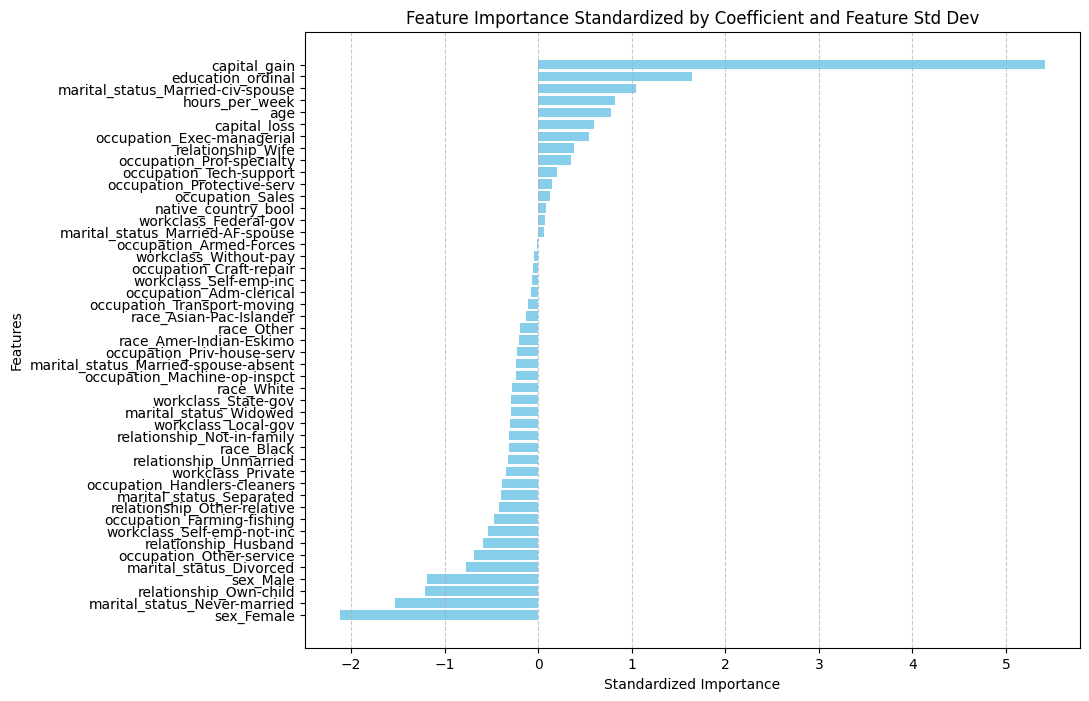

In [33]:
plot_features_importance(model_logReg, X_train, y_train)
